In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.express as px
import plotly.io as pio
from scipy import cluster
from sklearn.cluster import KMeans
from Funciones_auxiliares import plot_branch,get_cluster_indexs
pio.renderers.default='notebook'
%matplotlib notebook

In [68]:
'''Extraccion de datos, utilizamos unicamente pacientes 30,31,32 porque son los datos mas confiables'''
data = '/home/lorenzo/Principal/Doctorado/Noise-Neuron discriminator/Datos/Data_all_sessions_cleaned'
data = pd.read_pickle(data)
df = data[data.PatientExperiment.str.contains('HEC032|HEC031|HEC030')]
df.reset_index(inplace = True)
Neurons = df[df.bNoise == 0]
Neurons.reset_index(inplace = True)

<IPython.core.display.Javascript object>


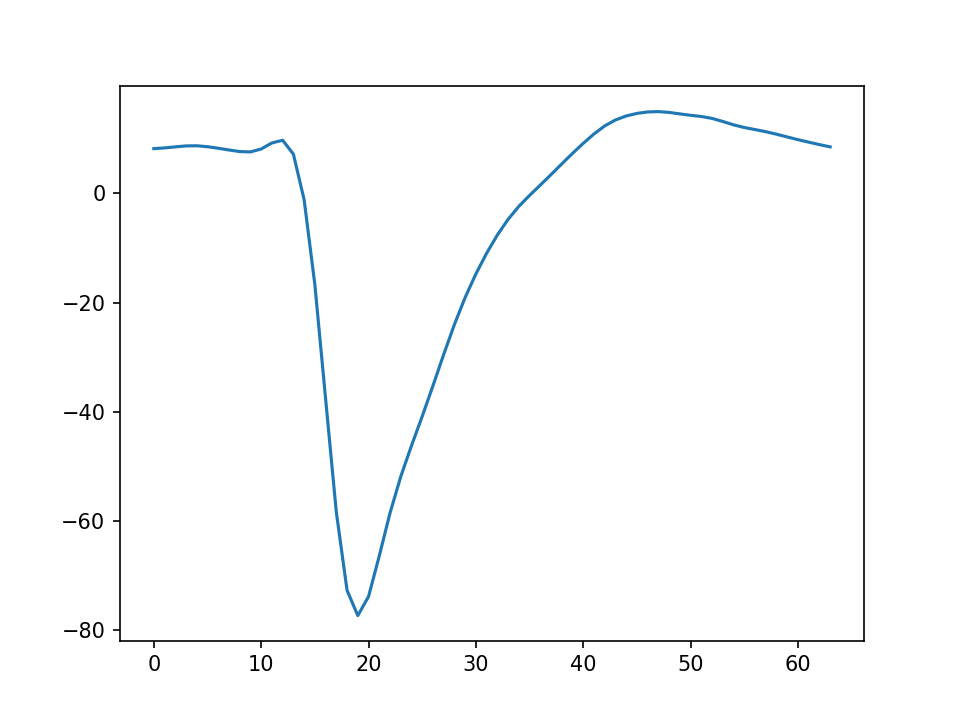

In [69]:
'''Ejemplo de media neuronal'''
neuron = Neurons.loc[32]
plt.plot(neuron.Mean)

<IPython.core.display.Javascript object>


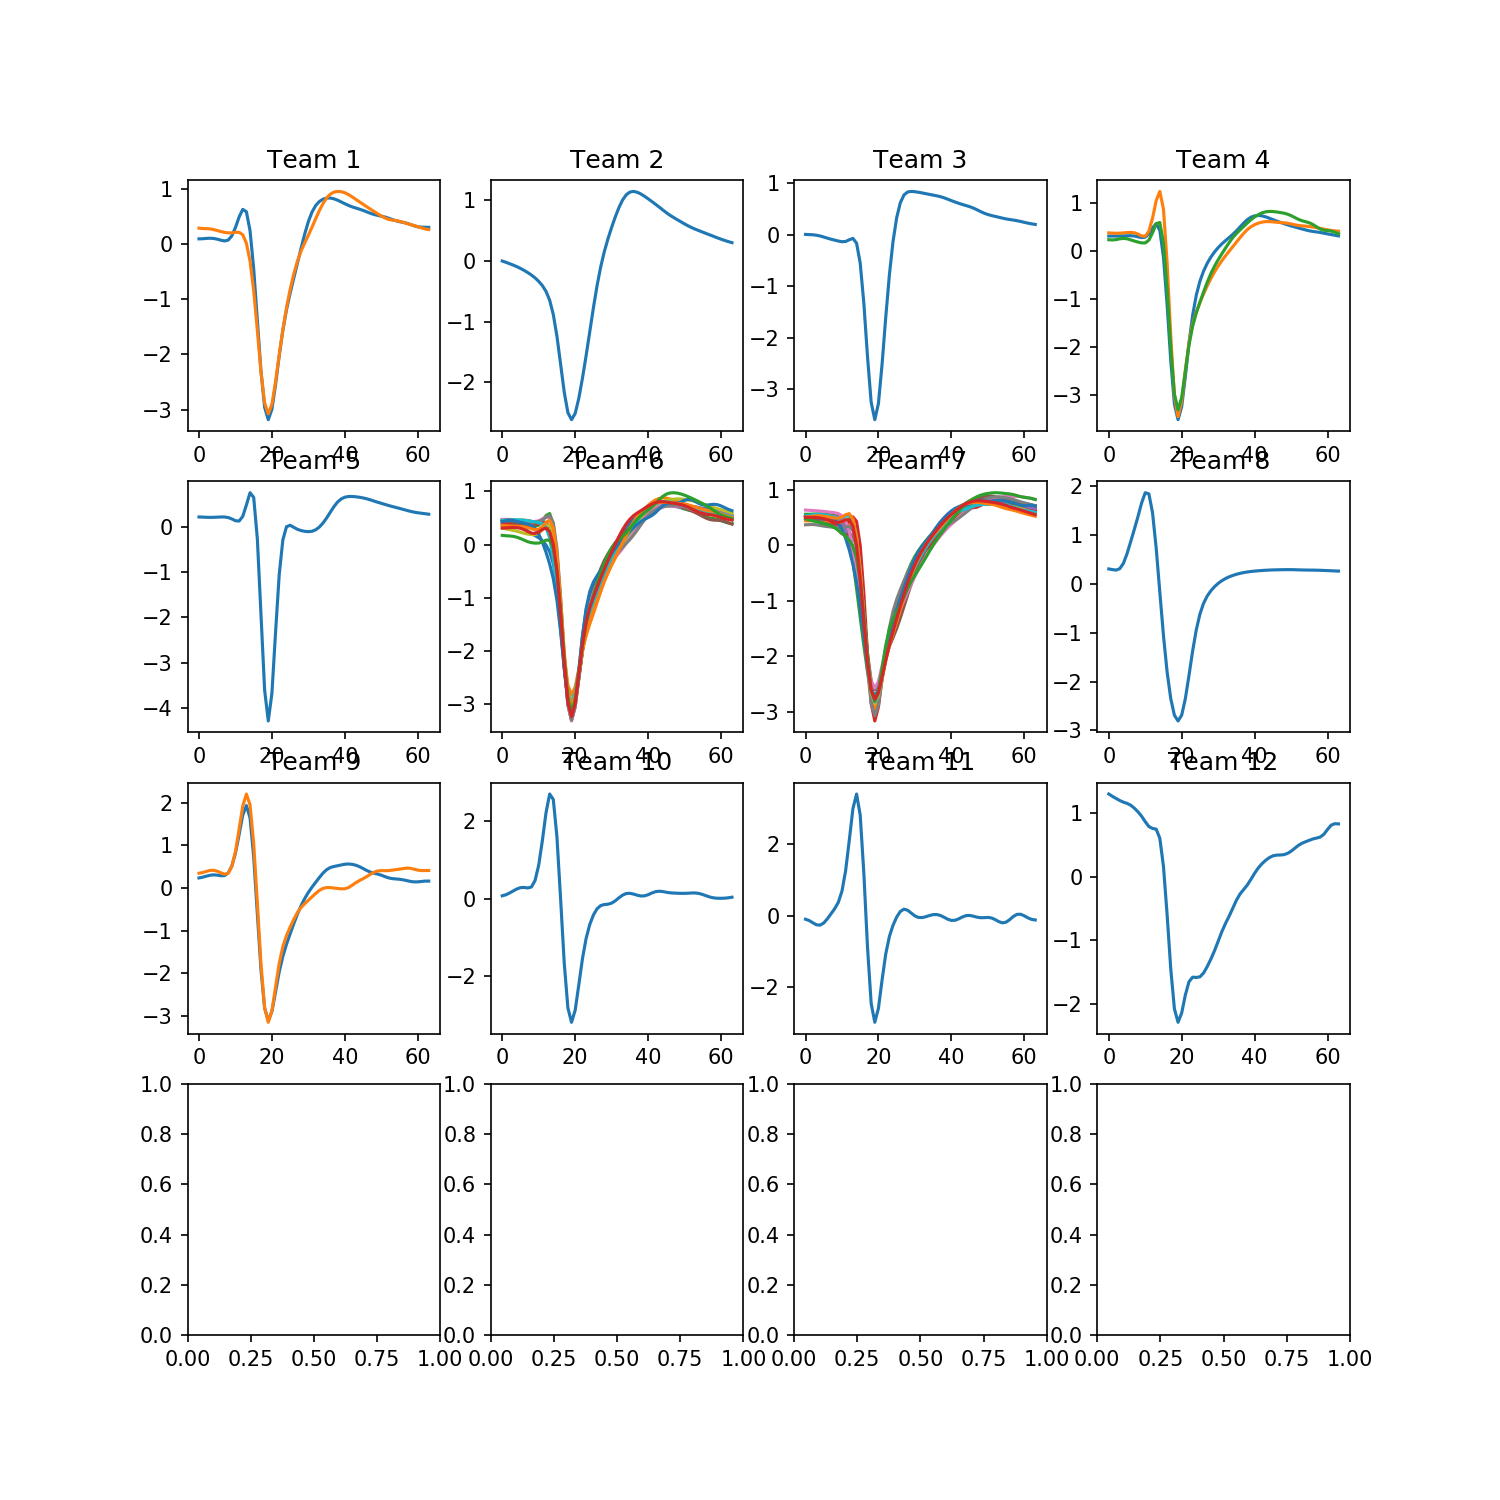

In [72]:
df = Neurons.copy()
'''Stadarization of the data'''
df['Mean'] = (df['Mean'] - df.Mean.apply(lambda row:np.mean(row)))/df.Mean.apply(lambda row:np.std(row))
Mean = pd.DataFrame(np.array(df.Mean.to_list())).values
'''Threshold = sqrt(-0.5ln(alpha)*(m + n )/(m*n)'''
threshold2 = 0.05
'''Plot matrix correlation clustered'''
linkage_p = cluster.hierarchy.linkage(Mean,method = 'complete',metric = 'correlation')
fl = cluster.hierarchy.fcluster(linkage_p,threshold2,criterion = 'distance')
'''Plot Teams'''
fig = plt.figure(3,figsize=(10,10))
axes = fig.subplots(int(max(fl)/4)+1,4)
axes_flt = axes.flat
for i in range(1,max(fl)+1):
    plot_branch(i,fl,axes_flt[i-1],df)
    axes_flt[i-1].title.set_text('Team {}'.format(i))
Cluster_selected = get_cluster_indexs(6,fl)
Cluster_selected

In [90]:

Neurons['derivative'] = Neurons.Mean.apply(lambda row: np.gradient(row))


In [16]:
Neurons['Embedding'] = Neurons.apply(lambda row:[row.Mean,row.derivative],axis = 1)

/home/lorenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
Neurons.Embedding.loc[1]

[array([ 1.29509713e+01,  1.20626440e+01,  1.14154221e+01,  1.32470773e+01,
         2.02589565e+01,  3.30753621e+01,  4.91040734e+01,  6.55188693e+01,
         8.25469896e+01,  1.00662947e+02,  1.14446420e+02,  1.12919696e+02,
         8.78644386e+01,  4.08254479e+01, -1.79139689e+01, -7.58738166e+01,
        -1.24332931e+02, -1.59887715e+02, -1.81900144e+02, -1.89514916e+02,
        -1.81695858e+02, -1.59752746e+02, -1.28826757e+02, -9.62328091e+01,
        -6.80906788e+01, -4.71014892e+01, -3.27609161e+01, -2.30707812e+01,
        -1.61128813e+01, -1.06980074e+01, -6.29619510e+00, -2.72372787e+00,
         1.25124299e-01,  2.39742114e+00,  4.25674751e+00,  5.80921364e+00,
         7.08997707e+00,  8.11519193e+00,  8.92092853e+00,  9.55871251e+00,
         1.00755242e+01,  1.05038379e+01,  1.08680515e+01,  1.11843939e+01,
         1.14468635e+01,  1.16390612e+01,  1.17706131e+01,  1.18760793e+01,
         1.19709792e+01,  1.20296217e+01,  1.20107704e+01,  1.18996804e+01,
         1.1

In [65]:
Embedding = pd.DataFrame.from_records(Neurons.Embedding.to_list(),columns= ['x','y'])

In [1]:
fig = plt.figure()
ax = fig.gca()
#for i,neuron in Embedding.loc[Cluster_selected]iterrows():
for i,neuron in Embedding.loc[se.label_pca == 1].iterrows():
    ax.plot(neuron.x,neuron.y)

NameError: name 'plt' is not defined

In [28]:
Neurons.columns



Index(['level_0', 'index', 'PatientExperiment', 'Channel', 'Cluster', 'Bulk',
       'bNoise', 'Mean', 'derivative', 'Embedding'],
      dtype='object')

In [30]:
Neurons.head()

,level_0,index,PatientExperiment,Channel,Cluster,Bulk,bNoise,Mean,derivative,Embedding
0,0,1372,HEC031_rsvpscr1,67,2,"[[-11.563305894690258, -8.207125932148251, -2....",0,"[2.4272503765462266, 2.4051030656860397, 2.465...","[-0.022147310860186842, 0.0191542244818681, 0....","[[2.4272503765462266, 2.4051030656860397, 2.46..."
1,1,1373,HEC031_rsvpscr1,83,3,"[[25.134183936912756, 18.264913446080172, 17.2...",0,"[12.950971328709867, 12.062644027736404, 11.41...","[-0.8883273009734634, -0.7677746025784531, 0.5...","[[12.950971328709867, 12.062644027736404, 11.4..."
2,2,1374,HEC031_rsvpscr2,69,2,"[[2.535495475658796, -2.1098178596102617, -2.1...",0,"[6.568477785692699, 6.369601444895855, 6.28384...","[-0.19887634079684435, -0.14231462038000187, -...","[[6.568477785692699, 6.369601444895855, 6.2838..."
3,3,1375,HEC031_rsvpscr3,71,4,"[[9.359468024719913, 8.570355071768784, 11.648...",0,"[5.8442197547900525, 5.898919139197591, 6.0909...","[0.054699384407538076, 0.12334421117752115, 0....","[[5.8442197547900525, 5.898919139197591, 6.090..."
4,4,1376,HEC031_rsvpscr3,74,2,"[[6.804122982915662, 10.93099612654017, 14.016...",0,"[5.67095538611333, 5.832288725892976, 5.783794...","[0.16133333977964615, 0.056419581522323625, -0...","[[5.67095538611333, 5.832288725892976, 5.78379..."


In [118]:
pd.DataFrame(trans_pca,columns = ['pca'])

ValueError: Shape of passed values is (42, 3), indices imply (42, 1)

In [126]:
pd.Series(trans_pca)

Exception: Data must be 1-dimensional

In [131]:
pd.Series(list(trans_pca))

0     [-125.9609524593538, 28.349757032134402, -10.8...
1     [250.16970515936598, -154.45482550542462, 166....
2     [-18.299023232905416, 7.553413760780351, -13.2...
3     [-32.427959052846354, 15.48774213587449, -18.0...
4     [-20.402334776030315, -13.292774476868363, 1.5...
5     [53.920940216281544, -30.588934236194035, -6.6...
6     [5.926722053775888, 13.57058743165464, -6.4920...
7     [-61.79749263271501, -26.749494060125112, -8.0...
8     [12.42522864888031, -8.491391159046213, -3.825...
9     [-12.337427080849565, -15.426688227252185, -10...
10    [-19.6774035275064, 14.461023607864187, -19.69...
11    [75.64121171636474, -26.750216576362728, 10.66...
12    [-39.60937365270783, 7.6741626012564454, 6.830...
13    [-87.82186060301575, 29.32132138390895, 1.9364...
14    [66.72676838882961, -116.4818151883067, -129.8...
15    [-53.32652052745458, 21.42036514602202, -17.85...
16    [-44.825584342103014, 13.513459085409533, -13....
17    [46.985420177215445, -16.90982537641179, -

In [140]:
df.pca

0     [-125.9609524593538, 28.349757032134402, -10.8...
1     [250.16970515936598, -154.45482550542462, 166....
2     [-18.299023232905416, 7.553413760780351, -13.2...
3     [-32.427959052846354, 15.48774213587449, -18.0...
4     [-20.402334776030315, -13.292774476868363, 1.5...
5     [53.920940216281544, -30.588934236194035, -6.6...
6     [5.926722053775888, 13.57058743165464, -6.4920...
7     [-61.79749263271501, -26.749494060125112, -8.0...
8     [12.42522864888031, -8.491391159046213, -3.825...
9     [-12.337427080849565, -15.426688227252185, -10...
10    [-19.6774035275064, 14.461023607864187, -19.69...
11    [75.64121171636474, -26.750216576362728, 10.66...
12    [-39.60937365270783, 7.6741626012564454, 6.830...
13    [-87.82186060301575, 29.32132138390895, 1.9364...
14    [66.72676838882961, -116.4818151883067, -129.8...
15    [-53.32652052745458, 21.42036514602202, -17.85...
16    [-44.825584342103014, 13.513459085409533, -13....
17    [46.985420177215445, -16.90982537641179, -